In [ ]:
0. Can you come up out 3 sceneraies which use AI methods?
Ans: Recommendding system, self driving, stock deal. 

1. How do we use Github; Why do we use Jupyter and Pycharm;
Ans: We use Github to store, manage, and share our code. The reason why we use Jupyter is that we can use it for better presentation.
    Also, we can use Pycharm for better project management.

2. What's the Probability Model?
Ans:The Probability Model is a model that can get the probability of different words combination or sentence, and the higher the probability is, the more likely correct and meaningful the sentence is.

3. Can you came up with some sceneraies at which we could use Probability Model?
Ans: The Probability Model is widely used in our life. for example, the judgement the likelihood of a sentence is meaningful and correct.

4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
Ans: There are 3 points that the programming is so difficult. 1. Text is not just a simple combination, but logic. 2.Text is diverse. 3. Text is unstrutured. 
Based on the 3 points, we usually use probability to measure the likelihood of a sentence's correctness.

5. What's the Language Model;
Ans:It's a model to get the probability of a sentence which is correct.

6. Can you came up with some sceneraies at which we could use Language Model?
Ans:1. Search engine; 2. text information mining.

7. What's the 1-gram language model;
Ans: The probability of a word apprearing in a sentence, which can be computed by the number of the word dividing the number of all words.

8. What's the disadvantages and advantages of 1-gram language model;
Ans: The advantage of the 1-gram language model is that it's simple and easy to compute, while the disadvantage is that it cannot be used to measure the probability of combination of the word and other words. 

9. What't the 2-gram models;
Ans:It is a language model that's used to get the probability of different word's combinations, and further get the most likely correct sentences.
    

In [7]:
from collections import Counter
import jieba
import random

In [18]:
incident = '''
incident = 时间 人 地方 做事情 别人 态度
时间 = 周一, | 周二, | 周三, | 周四, | 周五, | 周六, | 周日,
人 = 我 | 你 | 他 | 她 | 我们 | 你们 | 他们 | 大家
地方 = 在学校 | 在班级
做事情 = 帮助小明完成工作, | 考了高分, | 写完作业,
别人 = 老师 | 同学们 
态度 = 很高兴 | 态度冷淡 | 提出了表扬
'''

In [22]:
moral = '''
moral = 美德 评价 人 行动
美德 = 爱国 | 诚信 | 敬业 | 勤劳 | 坚强 | 谦逊 | 尊老爱幼
评价 = 是中华民族的传统美德, | 是民族文化的精髓, | 是民族复兴的重要保障, | 被大家认同,
人 = 我们 | 大家 | 全国人民 | 炎黄子孙 | 社会各界人士
行动 = 都在积极学习 | 都严格遵守执行 | 在广泛传播
'''

In [3]:
def generate(grammar_rule, target):
    if target in grammar_rule: # names 
        candidates = grammar_rule[target]  # ['name names', 'name']
        candidate = random.choice(candidates) #'name names', 'name'
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [4]:
def get_generation_by_gram(grammar_str, target, stmt_split='=', or_split='|'):

    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
      #  print(line)
        stmt, expr = line.split(stmt_split)
    
        rules[stmt.strip()] = expr.split(or_split)
    
    generated = generate(rules, target=target)
    
    return generated

In [17]:
get_generation_by_gram(incident, target='incident', stmt_split='=')

'周一,我们在学校帮助小明完成工作,同学很高兴'

In [23]:
get_generation_by_gram(moral, target='moral', stmt_split='=')

'敬业是民族复兴的重要保障,我们都在积极学习'

In [24]:
def generate_n(n, grammar_list, Target, stmt_split='=', or_split='|'):
    if n < 1:
        return 'Error! Please check your repeat number n!'
    else:
        for i in range(n-1):
            print(get_generation_by_gram(grammar_list, target=Target))

In [25]:
generate_n(20, incident, 'incident')

周日,他们在学校考了高分,同学们提出了表扬
周日,你们在班级写完作业,老师态度冷淡
周四,他在学校考了高分,同学们很高兴
周二,你在班级考了高分,老师态度冷淡
周二,我在学校考了高分,同学们很高兴
周五,他们在班级考了高分,老师很高兴
周一,他在学校帮助小明完成工作,老师很高兴
周二,我们在班级考了高分,老师很高兴
周三,他在学校写完作业,同学们很高兴
周六,你在学校帮助小明完成工作,老师态度冷淡
周一,我们在班级考了高分,老师很高兴
周日,我在学校写完作业,同学们很高兴
周三,你在班级写完作业,老师态度冷淡
周四,他们在学校考了高分,同学们提出了表扬
周日,她在学校帮助小明完成工作,同学们态度冷淡
周一,你在学校帮助小明完成工作,同学们态度冷淡
周五,他在学校帮助小明完成工作,同学们提出了表扬
周五,我在班级帮助小明完成工作,老师态度冷淡
周日,我们在班级考了高分,老师很高兴


In [26]:
generate_n(20, moral, 'moral')

尊老爱幼是民族复兴的重要保障,全国人民在广泛传播
爱国被大家认同,我们都严格遵守执行
谦逊被大家认同,炎黄子孙都在积极学习
敬业是民族复兴的重要保障,我们在广泛传播
坚强是中华民族的传统美德,大家都严格遵守执行
尊老爱幼是民族文化的精髓,炎黄子孙都在积极学习
敬业被大家认同,全国人民都在积极学习
诚信是民族复兴的重要保障,我们在广泛传播
诚信是民族文化的精髓,全国人民在广泛传播
诚信被大家认同,全国人民都严格遵守执行
尊老爱幼是中华民族的传统美德,全国人民在广泛传播
爱国是中华民族的传统美德,全国人民都严格遵守执行
诚信是民族文化的精髓,炎黄子孙都严格遵守执行
爱国被大家认同,我们都严格遵守执行
敬业是民族复兴的重要保障,社会各界人士都严格遵守执行
谦逊是民族文化的精髓,社会各界人士都在积极学习
尊老爱幼是民族复兴的重要保障,社会各界人士在广泛传播
坚强是中华民族的传统美德,我们都严格遵守执行
诚信是民族文化的精髓,全国人民都在积极学习


## Language Model

In [43]:
insurance_file = '/Users/wangqin/Downloads/jupyters_and_slides/jupyters_and_slides-master/2019-autumn/train.txt'
insurance_pri = [i.strip().split(' ') for i in open(insurance_file,'r',encoding='utf-8')]

In [44]:
#len(insurance_pri)
insurance_pri[0:10]

[['0',
  '++$++',
  'disability-insurance',
  '++$++',
  '法律要求残疾保险吗？',
  '++$++',
  'Is',
  '',
  'Disability',
  '',
  'Insurance',
  '',
  'Required',
  '',
  'By',
  '',
  'Law?'],
 ['1',
  '++$++',
  'life-insurance',
  '++$++',
  '债权人可以在死后人寿保险吗？',
  '++$++',
  'Can',
  '',
  'Creditors',
  '',
  'Take',
  '',
  'Life',
  '',
  'Insurance',
  '',
  'After',
  '',
  'Death?'],
 ['2',
  '++$++',
  'renters-insurance',
  '++$++',
  '旅行者保险有租赁保险吗？',
  '++$++',
  'Does',
  '',
  'Travelers',
  '',
  'Insurance',
  '',
  'Have',
  '',
  'Renters',
  '',
  'Insurance?'],
 ['3',
  '++$++',
  'auto-insurance',
  '++$++',
  '我可以开一辆没有保险的新车吗？',
  '++$++',
  'Can',
  '',
  'I',
  '',
  'Drive',
  '',
  'A',
  '',
  'New',
  '',
  'Car',
  '',
  'Home',
  '',
  'Without',
  '',
  'Insurance?'],
 ['4',
  '++$++',
  'life-insurance',
  '++$++',
  '人寿保险的现金转出价值是否应纳税？',
  '++$++',
  'Is',
  '',
  'The',
  '',
  'Cash',
  '',
  'Surrender',
  '',
  'Value',
  '',
  'Of',
  '',
  'Life',
  '',
  'Insura

In [219]:
import re
def search_valid_contents(string):
    return re.findall('\w+', string)

In [123]:
def get_text(input, column_index):
    if column_index > len(input[0]) - 1:
        return 'Error! Please check your column index!'
    else:
        temp = [''.join(search_valid_contents(str(i[column_index].strip()))) for i in input]
        return ''.join(temp)

In [32]:
def cut(string):
    return list(jieba.cut(string))

In [124]:
chinese_part = get_text(insurance_pri, 4)
chinese_part[0:10]

'法律要求残疾保险吗？'

In [237]:
tokens = cut(chinese_part)
tokens = [i for i in tokens if i != '？']
tokens.append('？')
tokens[0:10]

['法律', '要求', '残疾', '保险', '吗', '债权人', '可以', '在', '死', '后']

In [238]:
tokens[3]
words_count = Counter(tokens)
words_count
words_count.most_common(20)
#words_count.least_common(20)

[('保险', 4992),
 ('的', 3204),
 ('人寿保险', 2935),
 ('什么', 2663),
 ('吗', 2441),
 ('是', 2331),
 ('我', 2051),
 ('是否', 1843),
 ('可以', 1701),
 ('健康', 1510),
 ('如何', 1292),
 ('医疗保险', 1268),
 ('多少', 1244),
 ('汽车保险', 1187),
 ('在', 912),
 ('覆盖', 842),
 ('你', 826),
 ('有', 768),
 ('残疾', 721),
 ('房主', 712)]

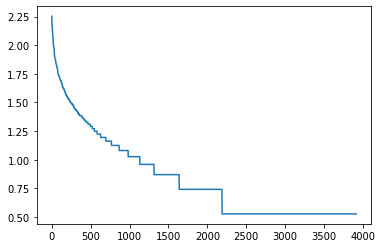

In [239]:
words_with_fre = [f for w, f in words_count.most_common()]
import matplotlib.pyplot as plt
words_with_fre[:10]
import numpy as np
plt.plot(np.log(np.log(np.array(words_with_fre, dtype=int) + 1) + 1)) # add sudo count to avoid log zero

In [240]:
words_with_fre[:10]

[4992, 3204, 2935, 2663, 2441, 2331, 2051, 1843, 1701, 1510]

In [241]:
_2_gram_words = [tokens[i] + tokens[i+1] for i in range(len(tokens)-1)]
_2_gram_word_counts = Counter(_2_gram_words)

In [242]:
_3_gram_words = [tokens[i] + tokens[i+1] for i in range(len(tokens)-1)]
_3_gram_word_counts = Counter(_3_gram_words)

In [75]:
def get_1_gram_count(word):
#     if word == '\n':
#         return words_count.most_common()[-1][-1]
    if word in words_count:
        return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [76]:
def get_2_gram_count(word):
#     if word.startswith('\n') or word.startswith('\n'):
#         return words_count.most_common()[-1][-1]
#     elif word in _2_gram_word_counts:
#         return _2_gram_word_counts[word]
    if word in _2_gram_word_counts:
        return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [ ]:
def get_3_gram_count(word):
    if word in _3_gram_word_counts:
        return _3_gram_word_counts[word]
    else:
        return _3_gram_word_counts.most_common()[-1][-1]

In [77]:
def get_gram_count(word, wc):
    if word in wc:
        return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [78]:
def two_gram_model(sentence):
    # 2-gram langauge model
    Tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(Tokens)-1):
        word = Tokens[i]
        next_word = Tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        
        probability *= pro
    
    return probability

In [115]:
def three_gram_model(sentence):
    # 3-gram langauge model
    Tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(Tokens)-2):
        word = Tokens[i]
        next_word = Tokens[i+1]
        next_two_word = Tokens[i+2]
        
#         _three_gram_c = get_gram_count(word+next_word+next_two_word, _3_gram_word_counts)
        _first_two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _last_two_gram_c = get_gram_count(next_word+next_two_word, _2_gram_word_counts)
        _sencond_gram_c = get_gram_count(next_word, words_count)
        _last_gram_c = get_gram_count(next_two_word, words_count)
        pro =  _first_two_gram_c * _last_two_gram_c / (_sencond_gram_c * _last_gram_c)
        
        probability *= pro
    
    return probability

In [112]:
def generate_n_sentence(prepared_words_list, x, words_number_lower_limit, words_number_upper_limit):
    if words_number_upper_limit < 2:
        return 'Error! Please check your input words number upper limit!'
    else:
        generated_words_lists = []
        for i in range(x):
            words_number = random.choice(range(words_number_lower_limit, words_number_upper_limit))
            selected_words = random.sample(prepared_words_list, words_number)
            generated_words_lists.append(''.join(selected_words))
        
        return generated_words_lists
        

In [128]:
def generate_best(prepared_words_list, n, lower_limit, upper_limit, gram_model):
    #print(gram_model)
    if gram_model not in [two_gram_model, three_gram_model]:
        return 'Error! You do not choose valid gram model, please choose it again!'
    else:
        generated_sentences = generate_n_sentence(prepared_words_list, n, lower_limit, upper_limit)
        generated_sentences_pro_list = []
        for _sentence in generated_sentences:
            generated_sentences_pro_list.append([_sentence, gram_model(_sentence)])
       # sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)    
        generated_sentences_pro_list_sorted = sorted(generated_sentences_pro_list, key=lambda x: x[1], reverse = True)
        print(generated_sentences_pro_list_sorted[0:10])
        return generated_sentences_pro_list_sorted[0]


In [244]:
generate_best(tokens, 500, 5, 10, two_gram_model)

[['购买人寿保险需要金是', 0.0005438020828962496], ['家庭保险保险费用事故保险', 0.000438512565378237], ['汽车保险诊所涵盖酒精中毒全国', 0.00010676916506512917], ['如何如何Lyrica出租全期', 5.733287467033597e-05], ['如何要求在事故保险', 1.3536928741607102e-05], ['使用是多少孕妇买能', 1.1509557329493021e-05], ['可保险费用纳税投保', 5.994125756758377e-06], ['树上计划GeicoIRA涵盖', 3.8591264481372e-06], ['人们辆车健康保险人寿保险', 2.372739375204485e-06], ['最放弃破损的停牌', 1.9506866416978776e-06]]


['购买人寿保险需要金是', 0.0005438020828962496]

In [247]:
generate_best(tokens, 500, 5, 10, three_gram_model)

[['保险同时考虑用人取消', 8.156739914191096e-07], ['盖的税务丢弃没有', 3.62918444967047e-07], ['我像补助费得到激励', 2.705159279778393e-07], ['中新旗C包括值得', 1.031364942399815e-07], ['人寿保险多少注射做出吗', 2.517492600014211e-08], ['车手金癫痫病马萨诸塞州吗', 2.5909998531628564e-09], ['吗吗你医疗卡司机', 1.1453232725571972e-09], ['的如何计划是否是盖牙有长期', 4.5036457794673947e-10], ['提供人寿保险什么目前是', 2.4599399919210343e-10], ['医保后储蓄免发生', 2.0269590614462163e-10]]


['保险同时考虑用人取消', 8.156739914191096e-07]

## Douban comments

In [217]:
import pandas as pd
movie_comments_file = '/Users/wangqin/Downloads/jupyters_and_slides/jupyters_and_slides-master/2019-autumn/movie_comments.csv'
movie_comments = pd.read_csv(movie_comments_file,encoding='utf-8')
movie_comments.head()
comments = movie_comments['comment'].tolist()
comments[0:10]
print(len(comments))

261497


In [220]:
print(''.join(str(search_valid_contents(comments[0]))))
# type(str(search_valid_contents(comments[0])).split('\n')) # need to add str(), otherwise it is Nonetype
# ''.join(str((search_valid_contents(comments[0]))))
def random_select_comments(_input, sample_number):
    return np.array(_input,dtype=str)[random.sample(range(len(_input)), int(sample_number))].tolist()



['吴京意淫到了脑残的地步', '看了恶心想吐']


In [223]:
# valid_contents = ['\n'.join(search_valid_contents(str(i))) for i in comments]
# ''.join(search_valid_contents(str(comments[1])))
# print(comments[1])
# comments = random_select_comments(comments, 50000)
valid_contents = [''.join(search_valid_contents(str(a))) for a in comments]
# type(valid_contents)
print(len(valid_contents))
valid_contents[0:10]
valid_contents2 = '\n'.join(valid_contents)
valid_contents2[0:100]

261497


'吴京意淫到了脑残的地步看了恶心想吐\n首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹\n吴京的炒作水平不输冯小刚但小刚至'

In [233]:
tokens = cut(valid_contents2)
# print(type(tokens))
tokens = [i for i in tokens if i != '\n']
tokens += ['\n'] # only leave one '\n'
# print(type(tokens))
words_count = Counter(tokens)
words_count['\n']

<class 'list'>
<class 'list'>


1

In [234]:
_2_gram_words = [tokens[i] + tokens[i+1] for i in range(len(tokens)-1)]
_2_gram_word_counts = Counter(_2_gram_words)

In [235]:
generate_best(tokens, 200, 5, 10, two_gram_model) # 200 is the number of generated setence, 5 is the lower limit number of words, 10 is the upper limit number of words. 

[['内再哥150很無聊', 0.015151515151515152], ['适合出李这个分恋要', 9.942334460131238e-05], ['更好亮TheDresser1983贱節奏演出', 2.0056768678066397e-07], ['现代战争DollhouseCaprica中午整个黑夜', 1.7933874218979778e-07], ['是巴特尔觉得年龄段看阳楼', 1.756493757421186e-07], ['这个向虽然真武田挺帥', 1.6747669561780478e-07], ['脸拯救人加看不下去在园美丽动人', 6.264552555586627e-08], ['20往家导演拥有者现实', 1.8384931563011504e-08], ['神偷福克斯实在角度挺要', 1.1469278585358995e-08], ['是太一纸空文就无耻', 7.367503018170508e-09]]


['内再哥150很無聊', 0.015151515151515152]

In [236]:
generate_best(tokens, 200, 5, 10, three_gram_model)

[['像陈茂贤很断翻', 0.003787878787878788], ['服装更好可不接和问', 5.160129127071276e-07], ['難道劇自身刃兰太', 3.300805000323479e-07], ['预告片了喜欢讲盖青', 4.023714021379796e-09], ['重复滥用火扯神了', 3.890847792320053e-12], ['外乡人水准道不明胸突然', 1.4159980367832915e-12], ['被在还是爱得', 8.44394048190094e-13], ['剧本去了所以责任感', 5.428016233651848e-13], ['们的强对于雞湯', 2.2772132042124433e-13], ['的的itsreallycoooooool其他没想到', 1.7376529941007236e-13]]


['像陈茂贤很断翻', 0.003787878787878788]

## Evaluation

In [ ]:
Q: 这个模型有什么问题？ 你准备如何提升？

Ans:这个模型虽然使用了2-gram和3-gram，但是在实际运用过程中还不够；而且本数据集还不够大（仅有1million的句子），许多常用词汇组合不在数据集里，故需要更多数据来改进模型表现；不同长度句子的概率没有可比性，可能需要一种标准化方法来标准化模型算出的句子概率。